# <p style='text-align: center;'>Tutorial: Game of Thrones Sentiment Analysis </p>

<p style='text-align: center;'><b>Bruno Almeida de Carvalho<sup>1</sup></b><br>
<sup>1</sup>Departamento de Estatística do Instituto de Matemática e Estatística– Universidade Federal da Bahia (UFBA)<br>
Avenida Ademar de Barros s/n, Campus de Ondina– 40.170-110 – Salvador – BA – Brazil<br>
bruno.carvalho@live.com<br> </p>

<p style='text-align: justify;'> O presente tutorial tem como objetivo mostrar o passo a passo da análise de sentimento (utilizando a biblioteca vaderSentiment) desenvolvida com as legendas (em inglês) da série Game of Thrones. As lengendas analisadas foram retiradas do site: <a href="http://www.tvsubtitles.net/tvshow-911-1.html">http://www.tvsubtitles.net/tvshow-911-1.html</a> e renomeadas obedecendo o padrão identificador "s##e##" onde "s" corresponde a temporada (season) e "e" ao episódio (episode). Exemplo: s01e01, 1º episódio da 1ª temporada.<br><br></p>

<p style='text-align: justify;'> <b>1º PASSO</b> - Carregar todas as bibliotecas que serão usadas no projeto:<br><br></p>

In [1]:
import pysrt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from bs4 import BeautifulSoup, Tag
from os import path
from PIL import Image
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import codecs
import logging
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
import warnings
warnings.filterwarnings("ignore")

<p style='text-align: justify;'> Tivemos a idéia de criar uma WordCloud que simbolizasse a nossa temática de projeto e como desafio criamos uma WordCloud no formato do lobo que simboliza a casa dos "Stark". <br><br></p>

# WordCloud

<p style='text-align: justify;'><b>2º PASSO</b> - Para criar nossa WordCloud concatenamos todos os episódios da 1ª temporada em um único arquivo, para isso escolhemos o caminho mais simples via prompt do Windows. Para abrir o prompt na pasta desejada (s01/), <b>clique com o botão direito do mouse + shift</b>, dentro da pasta desejada no Windows Explorer. Aparecerá a opção "abrir a janela do PowerShell aqui" (ou algo similar). Uma vez dentro do Prompt, digite: <b>copy *.srt  s01.srt </b>+ ENTER. Pronto! Arquivo com todas as legendas da 1ª temporada gerado. <br><br></p>

<p style='text-align: justify;'><b>3º PASSO</b> - Carregando a legenda concatenada utilizando a biblioteca <b>pysrt</b>, que é própria para editar legendas no formato <b>srt</b>:<br><br></p>

In [2]:
subs = pysrt.open('s01/s01.srt')

<p style='text-align: justify;'><b>4º PASSO</b> - Criando a função <i>clean_text</i> para substituir a grafia de expressões em inglês da forma contraída para a forma não contraída, usando a biblioteca <b>BeautifulSoup</b>:<br><br></p>

In [3]:
def clean_text(text):
    text = text.replace('\n',' ')
    soup = BeautifulSoup(text)

    for tag in soup.find_all('font'):
        tag.replaceWith('')
    text = soup.get_text()
    text = text.replace('they\'re','they are')
    text = text.replace('They\'re','They are')
    text = text.replace('They\'ve','They have')
    text = text.replace('they\'ve','they have')
    text = text.replace('I\'ve','I have')
    text = text.replace('won\'t','would not')
    text = text.replace('don\'t','do not')
    text = text.replace('Don\'t','Do not')
    text = text.replace('he\'ll','he will')
    text = text.replace('It\'s','It is')
    text = text.replace('it\'s','it is')
    text = text.replace('we\'re','we are')
    text = text.replace('you\'ve','you have')
    text = text.replace('You\'ve','You have')
    text = text.replace('You\'re','You are')
    text = text.replace('you\'re','you are')
    text = text.replace('he\'s','he is')
    text = text.replace('He\'s','He is')
    text = text.replace('she\'s','she is')
    text = text.replace('She\'s','She is')
    text = text.replace('I\'m','I am')
    text = text.replace('one\'s','one is')
    text = text.replace('We\'re','We are')
    text = text.replace('we\'re','we are')
    text = text.replace('didn\'t','did not')
    text = text.replace('That\'s','That is')
    text = text.replace('that\'s','that is')
    text = text.replace('There\'s','There is')
    text = text.replace('there\'s','there is')
    text = text.replace('We\'ll','We will')
    text = text.replace('we\'ll','we will')
    text = text.replace('We\'ve','We have')
    text = text.replace('we\'ve','we have')
    text = text.replace('Where\'s','Where is')
    text = text.replace('where\'s','where is')
    text = text.replace('haven\'t','have not')
    text = text.replace('we\'d','we would')
    text = text.replace('Isn\'t','Is not')
    text = text.replace('isn\'t','is not')
    text = text.replace('you\'d','you would')
    text = text.replace('You\'d','You would')
    text = text.replace('I\'d','I would')
    text = text.replace('aren\'t','are not')
    text = text.replace('you\'ll','you will')
    text = text.replace('You\'ll','You will')
    text = text.replace('it\'ll','it will')
    text = text.replace('It\'ll','It will')
    text = text.replace('weren\'t','were not')
    text = text.replace('men','man')
    text = text.replace('lannisters','lannister')
    text = text.replace('robb\'s','robb')
    text = text.replace('wasn\'t','was not')
    text = text.replace('\'','')
    text = text.replace('!','')
    text = text.replace('-','')
    text = text.replace('==','')
    text = text.replace(',',' ')
    text = text.replace('.',' ')
    text = text.replace('?',' ')
    text = text.replace('"',' ')
    text = text.lower()
    return text

<p style='text-align: justify;'> Aplicando a função criada no arquivo <b>s01.srt</b>, carregado dentro da variável subs:<br><br></p>

In [4]:
text = clean_text(subs.text)

<p style='text-align: justify;'><b>5º PASSO</b> - Carregando as stopwords e complementando a lista com nossas stopwords: <br><br></p>

In [5]:
stopwords = set(STOPWORDS)
stopwords.update(['would','ill','come','one','up.','up','whose','get','',' ','well','say','see','going',
                 'like','tell','want','make','know','year','go','yes','take','time','never','could','need',
                 'let','enough','many','keep','nothing','oh','look','father','think','cant','thing','still',
                  'even','heard','call','back','hear','u','ever','said','better','every','find','may','word',
                 'boy','man','lady','woman','give','must','day','done','right','good','always','little','long',
                 'seven','girl','son','brother','way','child','king','lord','mother','away','got','whats','ask',
                 'wanted','put','first','much','something','friend','sure','course','told','made','war','god',
                 'old','people','world','♪','grace','will','now','us','doesnt', 'ser'])

<p style='text-align: justify;'><b>6º PASSO</b> - Criando a WordCloud utilizando a imagem <b>got.png</b> (presente na pasta <i>img</i>), usando-a como "máscara" para a nossa WordCloud. Gerando o arquivo <b>got_word.png</b> na mesma pasta:<br><br></p>

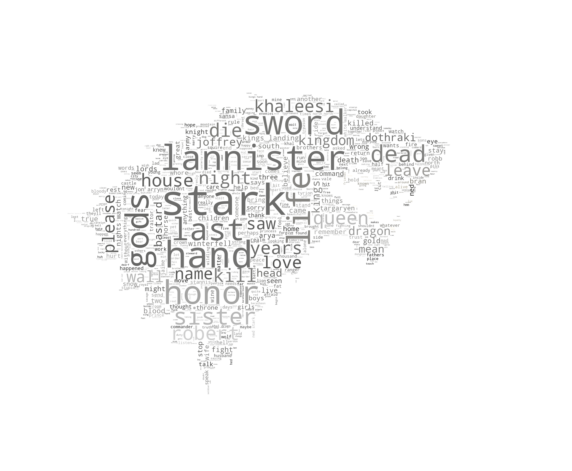

In [6]:
mask = np.array(Image.open("img/got.png"))
wordcloud_got = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_got.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("img/got_word.png", format="png")

plt.show()

# Vader Sentiment Analysis

<p style='text-align: justify;'><br><br> A análise de sentimento das legendas dos episódios de Game of Thrones, iniciará a partir do próximo passo: <br><br></p>

<p style='text-align: justify;'><b>7º PASSO</b> - Criando a função <i>clean_text</i> para substituir a grafia de expressões em inglês da forma contraída para a forma não contraída, usando a biblioteca <b>BeautifulSoup</b>:<br><br></p>

In [7]:
def clean_text(text):
    text = text.replace('\n',' ')
    soup = BeautifulSoup(text)

    for tag in soup.find_all('font'):
        tag.replaceWith('')
    text = soup.get_text()
    text = text.replace('they\'re','they are')
    text = text.replace('They\'re','They are')
    text = text.replace('They\'ve','They have')
    text = text.replace('they\'ve','they have')
    text = text.replace('I\'ve','I have')
    text = text.replace('won\'t','would not')
    text = text.replace('don\'t','do not')
    text = text.replace('Don\'t','Do not')
    text = text.replace('he\'ll','he will')
    text = text.replace('It\'s','It is')
    text = text.replace('it\'s','it is')
    text = text.replace('we\'re','we are')
    text = text.replace('you\'ve','you have')
    text = text.replace('You\'ve','You have')
    text = text.replace('You\'re','You are')
    text = text.replace('you\'re','you are')
    text = text.replace('he\'s','he is')
    text = text.replace('He\'s','He is')
    text = text.replace('she\'s','she is')
    text = text.replace('She\'s','She is')
    text = text.replace('I\'m','I am')
    text = text.replace('Ill','I will')
    text = text.replace('one\'s','one is')
    text = text.replace('We\'re','We are')
    text = text.replace('we\'re','we are')
    text = text.replace('didn\'t','did not')
    text = text.replace('That\'s','That is')
    text = text.replace('that\'s','that is')
    text = text.replace('There\'s','There is')
    text = text.replace('there\'s','there is')
    text = text.replace('We\'ll','We will')
    text = text.replace('we\'ll','we will')
    text = text.replace('We\'ve','We have')
    text = text.replace('we\'ve','we have')
    text = text.replace('Where\'s','Where is')
    text = text.replace('where\'s','where is')
    text = text.replace('haven\'t','have not')
    text = text.replace('we\'d','we would')
    text = text.replace('Isn\'t','Is not')
    text = text.replace('isn\'t','is not')
    text = text.replace('you\'d','you would')
    text = text.replace('You\'d','You would')
    text = text.replace('I\'d','I would')
    text = text.replace('aren\'t','are not')
    text = text.replace('you\'ll','you will')
    text = text.replace('You\'ll','You will')
    text = text.replace('it\'ll','it will')
    text = text.replace('It\'ll','It will')
    text = text.replace('weren\'t','were not')
    text = text.replace('men','man')
    text = text.replace('lannisters','lannister')
    text = text.replace('robb\'s','robb')
    text = text.replace('wasn\'t','was not')
    text = text.replace('ser','sir')
    text = text.replace('\'','')
    text = text.replace('♪','')
    text = text.replace('-','')
    text = text.replace('(','')
    text = text.replace(')','')
    return text

<p style='text-align: justify;'><b>8º PASSO</b> - Utilizando a biblioteca pysrt para ler o arquivo de legenda, a função clean_text para corrigir as expressões e a VaderSentiment para calcular a "polaridade" de cada legenda como um todo. O escore <i>"compound"</i> (composto) é calculado somando os escores de valência de cada palavra no léxico e depois normalizado para estar entre -1 (extremo negativo) e +1 (extremo positivo).<br><br> Obs: esse processo poderia ter sido realizado com um <i>"for"</i>, no entanto os resultados dos escores estavam retornando zerados, o que inviabilizou o uso dessa boa prática.<br><br></p>

In [9]:
analyzer = SentimentIntensityAnalyzer()


pols = []
subs = pysrt.open('s01e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e08.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e09.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s01e10.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e08.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e09.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s02e10.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e08.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e09.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s03e10.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e08.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e09.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s04e10.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e08.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e09.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s05e10.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e08.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e09.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s06e10.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s07e07.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s08e01.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s08e02.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s08e03.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s08e04.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s08e05.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
subs = pysrt.open('s08e06.srt')
sub = clean_text(subs.text)
pols.append(analyzer.polarity_scores(sub)['compound'])
print(pols)

[0.9983, -0.9989, 0.9972, 0.9995, -0.9999, -0.998, -0.9997, -0.9994, -0.9997, -0.9983, -0.9992, -0.9989, -0.9967, 0.9994, 0.9995, -0.9987, -0.9986, -0.9978, 0.9959, 0.9999, 0.9994, -0.9944, 0.9909, 0.9932, -0.9998, -0.9761, 0.9998, 0.9862, -0.9952, -0.9993, -0.7415, 0.9998, -0.9807, -0.9998, 0.9967, -0.9946, -0.9979, -0.9995, -0.997, -0.9996, 0.9759, 0.9994, 0.9998, -0.9993, -0.9994, 0.9892, 0.9992, -0.9988, 0.9964, -0.9999, -0.9975, -0.9996, 0.9995, -0.9945, 0.9987, -0.9919, -0.9997, -0.9991, -0.9993, -0.981, -0.9997, -0.6289, -0.9949, -0.9823, -0.5042, -0.9991, -1.0, 0.9963, -0.9926, -0.9972, -0.9972, -0.9875, 0.9934]


<p style='text-align: justify;'><b>9º PASSO</b> - Convertendo os escores do tipo lista para tupla:<br><br></p>

In [10]:
pols = tuple(pols)

<p style='text-align: justify;'><b>10º PASSO</b> - Criando uma lista com as <i>strings</i> correspondentes ao nome de cada arquivo de legenda:<br><br></p>

In [11]:
subs = ['s0'+str(i)+'e'+str(j)+'.srt' for i in range(1,7) for j in ('01','02','03','04','05','06','07','08','09','10')]
subs = subs + ['s07e0' + str(k)+'.srt' for k in range(1,8)]
subs = subs + ['s08e0' + str(l)+'.srt' for l in range(1,7)]

<p style='text-align: justify;'><b>11º PASSO</b> - Construindo um dicionário com os títulos de cada episódio e posteriormente criando um <i>DataFrame</i> com as seguintes variáveis: nome do arquivo da legenda, o título do episódio e o escore obtido na análise de sentimento.<br><br></p>

In [25]:
names = {
    subs[0]: 'Winter Is Coming',
    subs[1]: 'The Kingsroad',
    subs[2]: 'Lord Snow',
    subs[3]: 'Cripples, Bastards, and Broken Things',
    subs[4]: 'The Wolf and the Lion',
    subs[5]: 'A Golden Crown',
    subs[6]: 'You Win or You Die',
    subs[7]: 'The Pointy End',
    subs[8]: 'Baelor',
    subs[9]: 'Fire and Blood',
    subs[10]: 'The North Remembers',
    subs[11]: 'The Night Lands',
    subs[12]: 'What Is Dead May Never Die',
    subs[13]: 'Garden of Bones', 
    subs[14]: 'The Ghost of Harrenhal',
    subs[15]: 'The Old Gods and the New', 
    subs[16]: 'A Man Without Honor',
    subs[17]: 'The Prince of Winterfell',
    subs[18]: 'Blackwater',
    subs[19]: 'Valar Morghulis',
    subs[20]: 'Valar Dohaeris',
    subs[21]: 'Dark Wings, Dark Words',
    subs[22]: 'Walk of Punishment',
    subs[23]: 'And Now His Watch Is Ended',
    subs[24]: 'Kissed by Fire',
    subs[25]: 'The Climb',
    subs[26]: 'The Bear and the Maiden Fair',
    subs[27]: 'Second Sons',
    subs[28]: 'The Rains of Castamere',
    subs[29]: 'Mhysa',
    subs[30]: 'Two Swords',
    subs[31]: 'The Lion and the Rose',
    subs[32]: 'Breaker of Chains',
    subs[33]: 'Oathkeeper',
    subs[34]: 'First of His Name',
    subs[35]: 'The Laws of Gods and Men',
    subs[36]: 'Mockingbird',
    subs[37]: 'The Mountain and the Viper',
    subs[38]: 'The Watchers on the Wall',
    subs[39]: 'The Children',
    subs[40]: 'The Wars to Come',
    subs[41]: 'The House of Black and White',
    subs[42]: 'High Sparrow',
    subs[43]: 'Sons of the Harpy',
    subs[44]: 'Kill the Boy', 
    subs[45]: 'Unbowed, Unbent, Unbroken',
    subs[46]: 'The Gift',
    subs[47]: 'Hardhome',
    subs[48]: 'The Dance of Dragons',
    subs[49]: 'Mothers Mercy',
    subs[50]: 'The Red Woman',
    subs[51]: 'Home',
    subs[52]: 'Oathbreaker',
    subs[53]: 'Book of the Stranger',
    subs[54]: 'The Door',
    subs[55]: 'Blood of My Blood',
    subs[56]: 'The Broken Man',
    subs[57]: 'No One',
    subs[58]: 'Battle of the Bastards',
    subs[59]: 'The Winds of Winter',
    subs[60]: 'Dragonstone',
    subs[61]: 'Stormborn',
    subs[62]: 'The Queens Justice',
    subs[63]: 'The Spoils of War',
    subs[64]: 'Eastwatch',
    subs[65]: 'Beyond the Wall',
    subs[66]: 'The Dragon and the Wolf',
    subs[67]: 'Winterfell',
    subs[68]: 'A Knight of the Seven Kingdoms',
    subs[69]: 'The Long Night',
    subs[70]: 'The Last of the Starks',
    subs[71]: 'The Bells',
    subs[72]: 'The Iron Throne'
}

df = pd.DataFrame(names.items(), columns=['episode', 'name'])
df['score'] = pols
df['season'] = df.episode.str[:3]
df = df[['season', 'episode', 'name', 'score']]

print(df.head())

  season     episode                                   name   score
0    s01  s01e01.srt                       Winter Is Coming  0.9983
1    s01  s01e02.srt                          The Kingsroad -0.9989
2    s01  s01e03.srt                              Lord Snow  0.9972
3    s01  s01e04.srt  Cripples, Bastards, and Broken Things  0.9995
4    s01  s01e05.srt                  The Wolf and the Lion -0.9999


In [26]:
df

,season,episode,name,score
0,s01,s01e01.srt,Winter Is Coming,0.9983
1,s01,s01e02.srt,The Kingsroad,-0.9989
2,s01,s01e03.srt,Lord Snow,0.9972
3,s01,s01e04.srt,"Cripples, Bastards, and Broken Things",0.9995
4,s01,s01e05.srt,The Wolf and the Lion,-0.9999
5,s01,s01e06.srt,A Golden Crown,-0.9980
6,s01,s01e07.srt,You Win or You Die,-0.9997
7,s01,s01e08.srt,The Pointy End,-0.9994
8,s01,s01e09.srt,Baelor,-0.9997
9,s01,s01e10.srt,Fire and Blood,-0.9983


<p style='text-align: justify;'><b>12º PASSO</b> - Dividindo o <i>DataFrame</i> criado em temporadas, para posterior criação de gráficos:<br><br></p>

In [27]:
s01 = df.loc[df['episode'].str.contains('s01')]
s02 = df.loc[df['episode'].str.contains('s02')]
s03 = df.loc[df['episode'].str.contains('s03')]
s04 = df.loc[df['episode'].str.contains('s04')]
s05 = df.loc[df['episode'].str.contains('s05')]
s06 = df.loc[df['episode'].str.contains('s06')]
s07 = df.loc[df['episode'].str.contains('s07')]
s08 = df.loc[df['episode'].str.contains('s08')]

In [28]:
s01

,season,episode,name,score
0,s01,s01e01.srt,Winter Is Coming,0.9983
1,s01,s01e02.srt,The Kingsroad,-0.9989
2,s01,s01e03.srt,Lord Snow,0.9972
3,s01,s01e04.srt,"Cripples, Bastards, and Broken Things",0.9995
4,s01,s01e05.srt,The Wolf and the Lion,-0.9999
5,s01,s01e06.srt,A Golden Crown,-0.9980
6,s01,s01e07.srt,You Win or You Die,-0.9997
7,s01,s01e08.srt,The Pointy End,-0.9994
8,s01,s01e09.srt,Baelor,-0.9997
9,s01,s01e10.srt,Fire and Blood,-0.9983


<p style='text-align: justify;'><b>13º PASSO</b> - Criação dos gráficos com a biblioteca <i>Matplotlib</i>:<br><br></p>

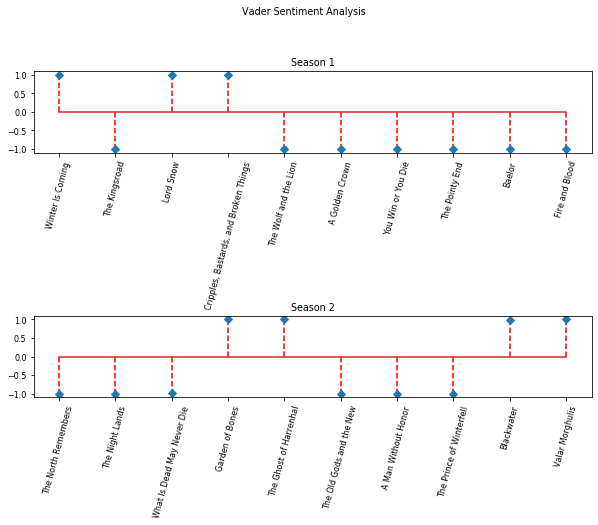

In [16]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(10,15))
plt.suptitle('Vader Sentiment Analysis', y=0.94)

plt.subplot(411)
plt.stem(s01['name'],
         s01['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 1')
plt.subplots_adjust(hspace=2.0)

plt.subplot(412)
plt.stem(s02['name'],
         s02['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 2')

plt.savefig("img/got_s01-s02.png", format="png")


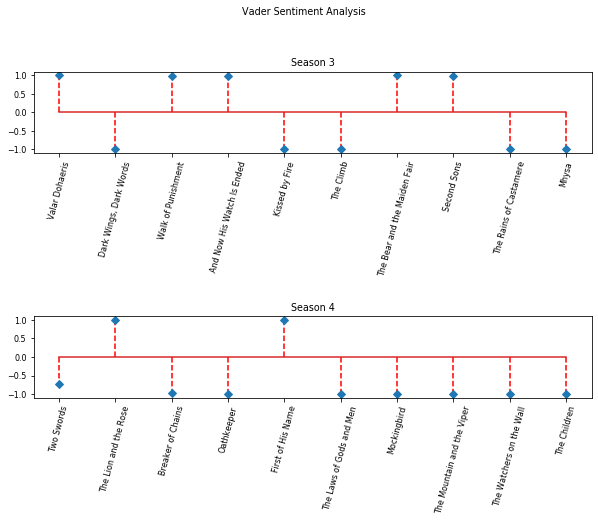

In [17]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(10,15))
plt.suptitle('Vader Sentiment Analysis', y=0.94)

plt.subplot(411)
plt.stem(s03['name'],
         s03['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 3')
plt.subplots_adjust(hspace=2.0)

plt.subplot(412)
plt.stem(s04['name'],
         s04['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 4')

plt.savefig("img/got_s03-s04.png", format="png")

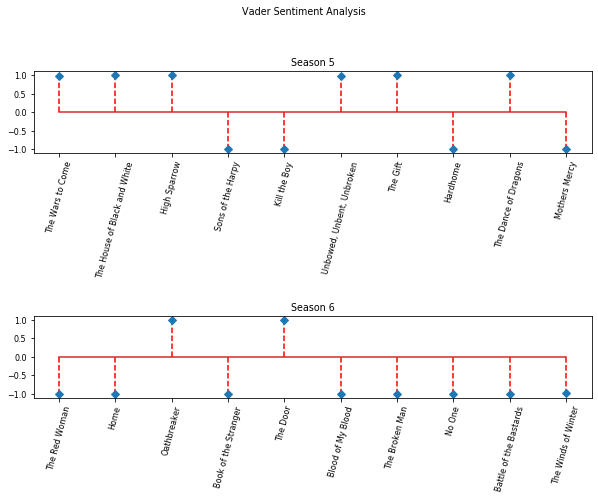

In [18]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(10,15))
plt.suptitle('Vader Sentiment Analysis', y=0.94)

plt.subplot(411)
plt.stem(s05['name'],
         s05['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 5')
plt.subplots_adjust(hspace=2.0)

plt.subplot(412)
plt.stem(s06['name'],
         s06['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 6')

plt.savefig("img/got_s05-s06.png", format="png")

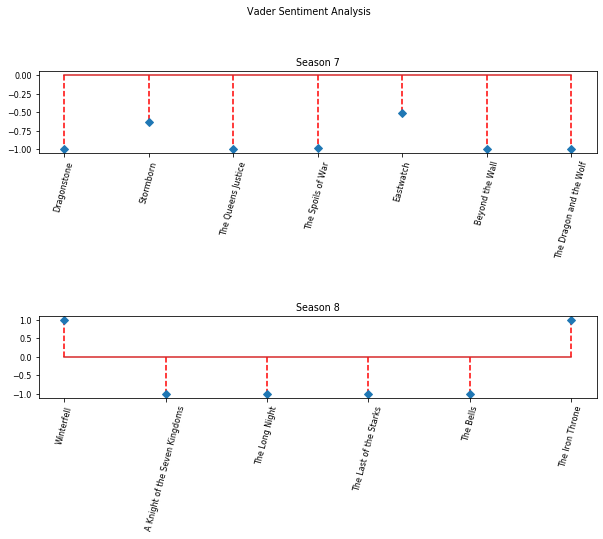

In [19]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(10,15))
plt.suptitle('Vader Sentiment Analysis', y=0.94)

plt.subplot(411)
plt.stem(s07['name'],
         s07['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 7')
plt.subplots_adjust(hspace=2.0)

plt.subplot(412)
plt.stem(s08['name'],
         s08['score'],
         markerfmt = 'D',
         linefmt = 'r--',
         bottom=0,
         use_line_collection = True)
plt.xticks(rotation=75)
plt.title('Season 8')

plt.savefig("img/got_s07-s08.png", format="png")